In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot
import preprocessing as pre
#from preprocessing import mean_on_analyte_batch, 
import seaborn as sns
from itertools import combinations

import matplotlib.cm as cm


****************************************
RUNNING IN DEVELOP
****************************************


/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:

#cs = ["slide_21","slide_22","slide_ 26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [3]:
cs = ["2018_03_21_slide_31",]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)
data = a2.Data(spots_dj=spots_dj)#.outlier_filtering()

In [4]:
data.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Replica
0,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),127.609177,275.347469,0.000000,2018_03_21_slide_37,microarray_2018_03_21,1.0,1.0,0.0
1,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),68.263566,58.617604,0.062500,2018_03_21_slide_37,microarray_2018_03_21,1.0,2.0,1.0
2,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),118.184335,200.664304,0.000000,2018_03_21_slide_37,microarray_2018_03_21,1.0,3.0,2.0
3,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),122.025237,246.627075,0.062500,2018_03_21_slide_37,microarray_2018_03_21,1.0,4.0,3.0
4,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),150.712025,228.552938,0.000000,2018_03_21_slide_37,microarray_2018_03_21,1.0,5.0,4.0
5,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),145.266614,192.311290,0.000000,2018_03_21_slide_37,microarray_2018_03_21,1.0,6.0,5.0
6,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),68.659574,46.404570,0.062500,2018_03_21_slide_37,microarray_2018_03_21,1.0,7.0,6.0
7,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),143.618671,226.354576,0.000000,2018_03_21_slide_37,microarray_2018_03_21,1.0,8.0,7.0
8,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),125.259494,170.130560,0.000000,2018_03_21_slide_37,microarray_2018_03_21,1.0,9.0,8.0
9,LF-0.05,0.0500,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),115.406646,133.714960,0.000000,2018_03_21_slide_37,microarray_2018_03_21,1.0,10.0,9.0


In [5]:
mean_on_anlyte_batch = data.mean_on_analyte_batch()
mean_spots_grouped = mean_on_anlyte_batch.groupby("Analyte Batch")
grouped_combinations = combinations(mean_spots_grouped,2)

In [6]:
peptide_c_signif = data.ligand_batch_significance()


In [7]:
len(list(grouped_combinations))

78

In [8]:
peptide_c_signif.groupby("Ligand Batch").apply(lambda x: x["Significance"].max()).sort_values(ascending=False)

Ligand Batch
LF-0.5       0.996751
P090         0.993669
P118         0.978577
P010         0.975857
P007         0.974278
P060         0.965545
P081         0.964982
P063         0.964474
P106         0.957170
LF-0.05      0.955660
P082         0.948080
P117         0.942955
P056         0.939609
P069         0.934987
P055         0.934865
P047         0.927336
P054         0.926335
P096         0.923607
LF-0.01      0.922277
P131.2       0.918761
P074         0.916457
P043         0.904559
P091         0.902752
P008         0.901514
LF-0.0001    0.895642
P119         0.891275
P012         0.885569
LF-0.001     0.877715
P115         0.867960
P052         0.866416
               ...   
P127         0.645508
P099         0.642323
P009         0.637852
P057         0.620004
P120         0.617157
P061         0.590602
P070         0.590484
P130         0.588695
P114         0.580982
P132         0.567152
P073         0.556850
P080         0.544216
P045.3       0.534091
P105         0.5300

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


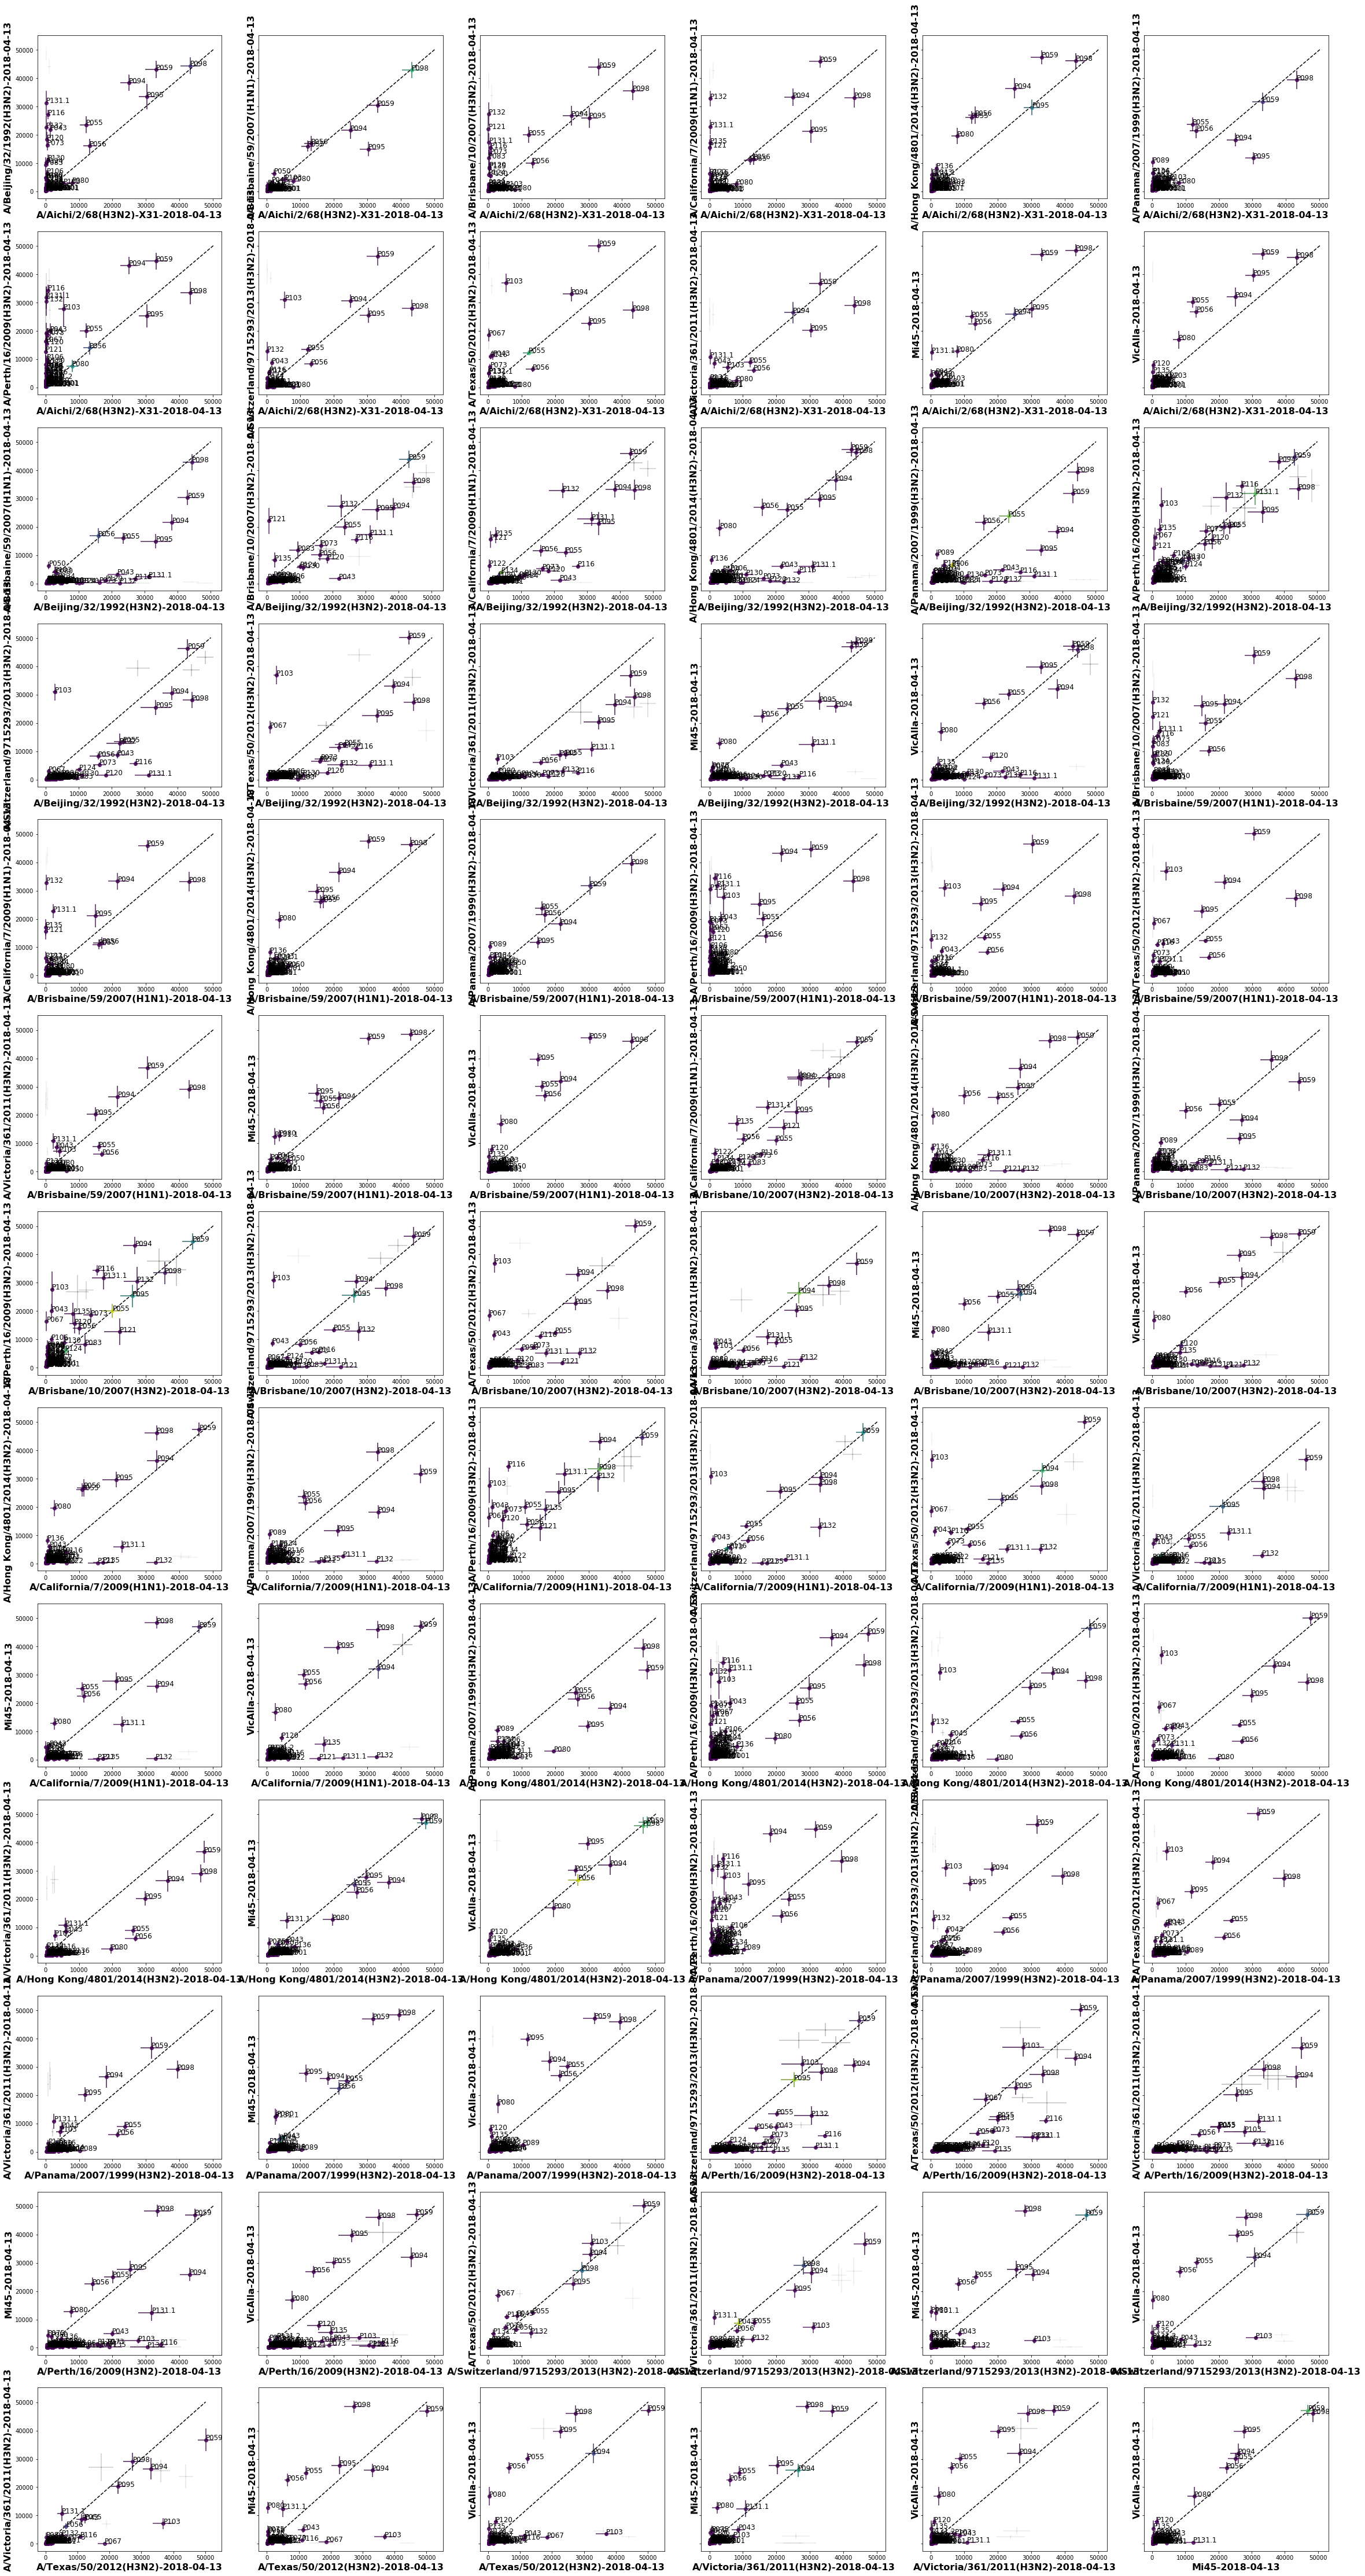

In [12]:
fig, axes = plt.subplots(ncols=6,nrows=13, figsize = (40,80), sharey=True)

ax_it = iter(axes.flatten())
peptide_c_signif.dropna(inplace=True)
cmap = cm.viridis
for name, d in peptide_c_signif.groupby("Analyte Batches"):
    x = y = np.linspace(peptide_c_signif.V1_I.min(),peptide_c_signif.V1_I.max())
    ax = next(ax_it)
    ax.plot(x,y,linestyle="--",marker=" ", c="k", alpha=1)
    #ax.set_title("{} vs. {}".format(name[1],name[0]), size = 20)
    ax.set_xlabel(name[0], size = 16, weight = 'bold')
    ax.set_ylabel(name[1], size = 16, weight = 'bold')
    #ax.set_xlim(0,x.max())
    #ax.set_ylim(0,y.max())

    
    #ax.set_xscale("log")
    #ax.set_yscale("log")



    #norm = Normalize(d.Significance.min(),d.Significance.max())
    d.sort_values("Significance",ascending=False, inplace=True)
    boundary = 0.15
    #d_selected = d[d["Significance"] < boundary]
    #d_n = d[d["Significance"] > boundary]
    
    d_selected = d[~d["Ligand Batch"].isin(["P125","P084","Nenad","132","P102"])]
    d_n = d
    
    #d_selected = d.loc[d["Peptide"].isin(["Pep_80","Pep_43","Pep_55","Pep_56","Pep_59","Pep_61","Pep_63","Pep_83","Pep_94","Pep_95","Pep_98","Pep_100","Pep_102","Pep_103","Pep_121" ,"Pep_125","Pep_131.2","Nenad","Pep_49","Pep_50"])]
    #d_selected = d.loc[d["Ligand Batch"].isin(["Nenad"])]
    #d_selected = d.loc[d["Peptide"].isin(["Pep_43","Pep_55","Pep_56","Pep_59","Pep_63","Pep_131.2"])]


    

    alphas = iter(np.linspace(0.3,0.05,len(d)))
    

    for ii, dp in d_selected.iterrows():
        #if dp.Significance is not np.NaN:
            c = cmap(dp.Significance)
            ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = c, fmt="o",linestyle="",alpha=0.8, capthick=2)
            ax.annotate(dp["Ligand Batch"],(dp.V1_I+0.01,dp.V2_I+0.01), size=12)
    
    for ii, dp in d_n.iterrows():
        c = cmap(dp.Significance)
        ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = "k", fmt="o",linestyle="",alpha=next(alphas), ms = 0.5, capthick=1)
        
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    uri_name1 = name[0].replace("/","-")
    uri_name2 = name[1].replace("/","-")


#plt.savefig(directory+"all_correlations.png", bbox_inches="tight")    
plt.show()    

In [71]:
peptide_c_signif[peptide_c_signif["Ligand Batch"]=="P084"].sort_values(by="Significance")

,Ligand Batch,Analyte Batches,Significance,V1_I,V2_I,V1_Err,V2_Err,V1_Count,V2_Count
368,P084,"(A/Beijing/32/1992(H3N2)-2018-04-13, A/Hong Ko...",5.49394e-45,48392.7,3439.15,1758.8,506.195,23,15
412,P084,"(A/Beijing/32/1992(H3N2)-2018-04-13, A/Panama/...",1.0846e-42,48392.7,1867.91,1758.8,280.606,23,13
1620,P084,"(A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Swi...",2.34673e-41,3439.15,38660.9,506.195,2158.21,15,27
1842,P084,"(A/Panama/2007/1999(H3N2)-2018-04-13, A/Switze...",1.77971e-39,1867.91,38660.9,280.606,2158.21,13,27
1240,P084,"(A/California/7/2009(H1N1)-2018-04-13, A/Hong ...",1.13268e-38,43170.3,3439.15,2488.58,506.195,24,15
1279,P084,"(A/California/7/2009(H1N1)-2018-04-13, A/Panam...",1.06894e-36,43170.3,1867.91,2488.58,280.606,24,13
1649,P084,"(A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Tex...",2.31673e-35,3439.15,37335,506.195,2853.69,15,26
1875,P084,"(A/Panama/2007/1999(H3N2)-2018-04-13, A/Texas/...",1.05856e-33,1867.91,37335,280.606,2853.69,13,26
653,P084,"(A/Beijing/32/1992(H3N2)-2018-04-13, VicAlla-2...",5.56881e-32,48392.7,8411.3,1758.8,2470.26,23,10
1680,P084,"(A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Vic...",2.43194e-30,3439.15,38515.8,506.195,2855.36,15,18


In [69]:
peptide_c_signif.groupby("Ligand Batch").apply(lambda x: x["Significance"].min()).sort_values()

Ligand Batch
P084      5.493943e-45
P055      4.261089e-43
P116      2.248574e-42
P056      6.715651e-42
P103      5.328310e-37
P095      3.624353e-36
Nenad     4.311728e-35
P120      1.615829e-34
P059      2.604975e-33
P098      1.252241e-31
P125      2.691845e-31
P094      1.992645e-30
P124      3.155571e-28
P043      4.761997e-28
P100      2.409461e-27
P073      4.325237e-27
P082      8.440890e-26
P080      1.085548e-24
P106      1.305040e-23
P131.1    1.008519e-22
P121      1.151910e-22
P102      9.694864e-22
P132      4.749624e-21
P069      3.613313e-20
P136      1.845444e-19
P105      1.041879e-18
P130      1.013107e-17
P010      2.170166e-17
P099      3.359271e-17
P135      4.954036e-15
              ...     
P090      5.125478e-10
P115      7.123438e-09
P061      1.308017e-08
P081      4.469893e-08
P131.2    4.929625e-08
P050      9.780481e-08
P134      3.075490e-07
P127      3.449973e-07
P072      1.839199e-06
P101      2.981630e-06
P083      5.735376e-06
P086      1.757314e-0